# Natural Language Processing with RNNs - Toxic Comment Classification

Outline:

1. Download and explore the data
2. Prepare the data for training
3. Build a recurrent neural network
4. Train & evaluate the model
5. Make predictions & submit to Kaggle

## Download & explore the Data

Outline:
1. Download the data from the Kaggle
2. Load data into Panda dataframes
3. Explore the dataset

In [ ]:
!pip install torch==2.1.2 torchtext==0.16.2

In [ ]:
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [ ]:
!chmod 600 ./kaggle.json

In [ ]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

  0% 0.00/52.6M [00:00<?, ?B/s]
100% 52.6M/52.6M [00:00<00:00, 561MB/s]


In [ ]:
!unzip jigsaw-toxic-comment-classification-challenge.zip -d data

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: data/sample_submission.csv.zip  
  inflating: data/test.csv.zip       
  inflating: data/test_labels.csv.zip  
  inflating: data/train.csv.zip      


In [ ]:
!unzip data/train.csv.zip -d data/
!unzip data/test.csv.zip -d data/
!unzip data/sample_submission.csv.zip -d data/
!unzip data/test_labels.csv.zip -d data/
!rm data/*.zip


Archive:  data/train.csv.zip
  inflating: data/train.csv          
Archive:  data/test.csv.zip
  inflating: data/test.csv           
Archive:  data/sample_submission.csv.zip
  inflating: data/sample_submission.csv  
Archive:  data/test_labels.csv.zip
  inflating: data/test_labels.csv    


In [ ]:
!pip uninstall -y torch torchvision torchtext torchdata pytorch_lightning
!pip install torch==2.1.2 torchvision==0.16.2 torchtext==0.16.2 pytorch_lightning==2.1.2 --quiet

Found existing installation: torch 2.1.2
Uninstalling torch-2.1.2:
  Successfully uninstalled torch-2.1.2
Found existing installation: torchvision 0.16.2
Uninstalling torchvision-0.16.2:
  Successfully uninstalled torchvision-0.16.2
Found existing installation: torchtext 0.16.2
Uninstalling torchtext-0.16.2:
  Successfully uninstalled torchtext-0.16.2
Found existing installation: torchdata 0.7.1
Uninstalling torchdata-0.7.1:
  Successfully uninstalled torchdata-0.7.1
Found existing installation: pytorch-lightning 2.1.2
Uninstalling pytorch-lightning-2.1.2:
  Successfully uninstalled pytorch-lightning-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtune 0.6.1 requires torchdata==0.11.0, but you have torchdata 0.7.1 which is incompatible.
torchaudio 2.6.0+cu124 requires torch==2.6.0, but you have torch 2.1.2 which is incompatible.


In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
sub_df = pd.read_csv('data/sample_submission.csv')

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
raw_df.sample(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
78057,d0f51b29ea70f5c8,Russians bring us Vodka??? What a stereotype!...,0,0,0,0,0,0
35527,5eec4ef5bbb527e5,"""Your change to the page Michael Jackson was d...",0,0,0,0,0,0
34270,5b7d07e3b5faac8f,Also if I upload a higher quality cover of Str...,0,0,0,0,0,0
72723,c292ec84d55b296b,Cool. That's why the Mac OS X page has been u...,0,0,0,0,0,0
158255,eb0aefaa9021af17,"""\n\nYet you leave """"walmart facts"""" remain w...",0,0,0,0,0,0
104085,2cf4c1ccf3498caf,Will do. It's quite interesting because they a...,0,0,0,0,0,0
139439,ea4b28233d08fc2f,"""\n\nHypocrisy on Wikipedia?\nLately I've been...",0,0,0,0,0,0
102550,24d540ea09e9cff9,"""\nThe problem is that there already is anothe...",0,0,0,0,0,0
138994,e7d29c630440d83b,"WWE does make some mistakes, her profile will ...",0,0,0,0,0,0
73031,c363502199159381,Levels vs. Profiles definitions in table? \n\n...,0,0,0,0,0,0


In [ ]:
raw_df.comment_text.values[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [ ]:
target_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [ ]:
for col in target_cols:
    print(raw_df[col].value_counts(normalize=True))

toxic
0    0.904156
1    0.095844
Name: proportion, dtype: float64
severe_toxic
0    0.990004
1    0.009996
Name: proportion, dtype: float64
obscene
0    0.947052
1    0.052948
Name: proportion, dtype: float64
threat
0    0.997004
1    0.002996
Name: proportion, dtype: float64
insult
0    0.950636
1    0.049364
Name: proportion, dtype: float64
identity_hate
0    0.991195
1    0.008805
Name: proportion, dtype: float64


In [ ]:
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [ ]:
sub_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5


## Prepare the Dataset for Training

Outline:
- Create a vocabulary using TorchText
- Create training & validation sets
- Create PyTorch dataloaders

### Create a vocabulary

In [ ]:
!pip install torchtext


In [ ]:
from torchtext.data.utils import get_tokenizer


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

In [ ]:
!pip install numpy --upgrade

In [ ]:
tokenizer = get_tokenizer('basic_english')

In [ ]:
sample_comment = raw_df.comment_text.values[0]

In [ ]:
sample_comment

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [ ]:
sample_comment_tokens = tokenizer(sample_comment)
sample_comment_tokens[:10]

['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 'hardcore',
 'metallica']

In [ ]:
from torchtext.vocab import build_vocab_from_iterator

In [ ]:
comment_tokens = raw_df.comment_text.apply(tokenizer)

In [ ]:
VOCAB_SIZE = 1500

In [ ]:
unk_token = '<unk>'
pad_token = '<pad>'

In [ ]:
vocab = build_vocab_from_iterator(comment_tokens,
                                  specials=[unk_token, pad_token],
                                  max_tokens=VOCAB_SIZE)

In [ ]:
vocab[unk_token]

0

In [ ]:
vocab.set_default_index(vocab[unk_token])

In [ ]:
vocab['this']

18

In [ ]:
vocab['hardcore']

0

In [ ]:
sample_indices = vocab.lookup_indices(sample_comment_tokens)
sample_indices[:10]

[667, 85, 3, 140, 142, 185, 39, 663, 0, 0]

### Create Training & Validation Sets
- Define a custom Pytorch Dataset
- Pass raw data into the dataset
- Split the PyTorch Dataset

<Axes: ylabel='Frequency'>

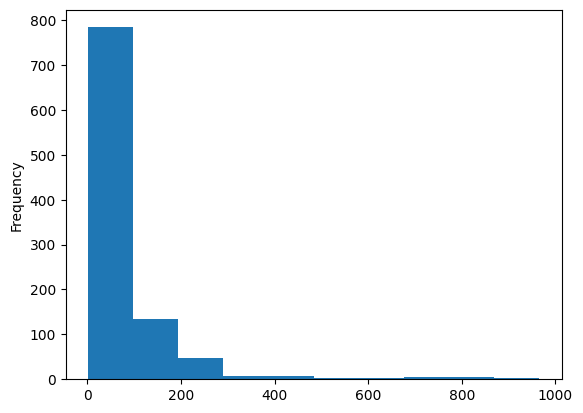

In [ ]:
raw_df.comment_text.sample(1000).map(tokenizer).map(len).plot(kind='hist')

In [ ]:
MAX_LENGTH = 150

In [ ]:
def pad_tokens(tokens):
  if (len(tokens) >= MAX_LENGTH):
    return tokens[:MAX_LENGTH]
  else:
    return tokens + [pad_token]*(MAX_LENGTH - len(tokens))

In [ ]:
import torch

In [ ]:
from torch.utils.data import Dataset

In [ ]:
class JigsawDataset(Dataset):
  def __init__(self, df, is_test=False):
    self.df = df
    self.is_test = is_test

  def __getitem__(self, index):
    comment_text = self.df.comment_text.values[index]
    comment_tokens = pad_tokens(tokenizer(comment_text))
    input = torch.tensor(vocab.lookup_indices(comment_tokens))
    if self.is_test:
      target = torch.tensor([0,0,0,0,0,0]).float()
    else:
      target = torch.tensor(self.df[target_cols].values[index].astype(float)).float()
    return input, target

  def __len__(self):
    return len(self.df)

In [ ]:
raw_ds = JigsawDataset(raw_df)

In [ ]:
raw_df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
raw_ds[0]

(tensor([ 667,   85,    3,  140,  142,  185,   39,  663,    0,    0, 1287,   96,
          329,   27,   57,    0,    9,   31,    0,    4,   61,    0,   21,   71,
            0,  158,    6,    0,   45,  130, 1167,    0,    0,    2,    8,   55,
           70,    9,   31,  253,    3,  369,   41,    3,   50,   38,  155,    6,
            9,   81,    0,   99,    2,    0,    2,    0,    2,    0,    2, 1122,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

In [ ]:
from torch.utils.data import random_split

In [ ]:
VAL_FRAC = 0.25

In [ ]:
train_ds, val_ds = random_split(raw_ds, [1-VAL_FRAC, VAL_FRAC])

In [ ]:
len(raw_ds), len(train_ds), len(val_ds)

(159571, 119679, 39892)

In [ ]:
test_ds = JigsawDataset(test_df, is_test=True)

In [ ]:
test_df.head(5)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
test_ds[0]

(tensor([   0,  636,    0,  649,   12,   69,    0,   93,   10,    9,  169,  359,
           23,    0,   89,   30,   10,    8,    0,   10, 1488,    0,    2,    2,
            2,    6,   68,  636,    0,    0,    0,  690,    0,    8,  105,   10,
            5,    0,   39,  419,   10,  699,    0,   46,    2,    0,  649,   12,
           47,    0,   15,    0,  668,  439,    2,  443,    0,   13,  332,   21,
          167,    2,    8,    0,   12,  251,    0,   62,    0,   59,   34,   11,
            0,  171,    2,    2,    2,    0,  690,    0,  105,  226,  160,  490,
           95,    2,    4,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

### Create PyTorch Dataloaders

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
BATCH_SIZE = 256

In [ ]:
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=8, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE*2, shuffle=False, num_workers=8, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE*2, shuffle=False, num_workers=8, pin_memory=True)


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
for batch in train_dl:
  b_inputs, b_targets = batch
  print('b_input.shape', b_inputs.shape)
  print('b_targets.shape', b_targets.shape)
  break

b_input.shape torch.Size([256, 150])
b_targets.shape torch.Size([256, 6])


## Build a Recurrent Neural Network
Outline:
1. Understand how recurrent neural networks work
2. Create a recurrent neural network
3. Pass some through the network

In [ ]:
import torch.nn as nn
import torch.functional as F

In [ ]:
vocab.lookup_indices([pad_token])

[1]

In [ ]:
emb_layer = nn.Embedding(VOCAB_SIZE, 256, 1)

In [ ]:
rnn_layer = nn.RNN(256, 128, 1, batch_first=True)

In [ ]:
for batch in train_dl:
  b_inputs, b_targets = batch
  print('b_input.shape', b_inputs.shape)
  print('b_targets.shape', b_targets.shape)

  emb_out = emb_layer(b_inputs)
  print('emb_out.shape', emb_out.shape)

  rnn_out, hn = rnn_layer(emb_out)
  print('rnn_out.shape', rnn_out.shape)
  print('hn.shape', hn.shape)

  break

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


b_input.shape torch.Size([256, 150])
b_targets.shape torch.Size([256, 6])
emb_out.shape torch.Size([256, 150, 256])
rnn_out.shape torch.Size([256, 150, 128])
hn.shape torch.Size([1, 256, 128])


In [ ]:
import pytorch_lightning as pl

In [ ]:
import torch.nn.functional as F

In [ ]:
import numpy as np

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pytorch_lightning as pl

class JigsawModel(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.emb = nn.Embedding(VOCAB_SIZE, 256, 1)
        self.lstm = nn.LSTM(256, 128, 1, batch_first=True)
        self.linear = nn.Linear(128, 6)
        self.learning_rate = 0.001
        self.validation_step_outputs = []


    def forward(self, x):
        out = self.emb(x)
        out, hn = self.lstm(out)
        out = F.relu(out[:,-1,:])
        out = self.linear(out)
        return out

    def training_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        probs = torch.sigmoid(outputs)
        loss = F.binary_cross_entropy(probs, targets)
        return loss

    def validation_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        probs = torch.sigmoid(outputs)
        loss = F.binary_cross_entropy(probs, targets)
        self.validation_step_outputs.append(loss.item())
        return loss.item()

    def on_validation_epoch_end(self):
        loss = np.mean(self.validation_step_outputs)
        print("Epoch #{}; Loss: {:4f} ".format(self.current_epoch, loss))
        self.validation_step_outputs.clear() # free memory

    def predict_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        probs = torch.sigmoid(outputs)
        return probs

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.learning_rate)

In [ ]:
model = JigsawModel()

In [ ]:
for batch in train_dl:
    b_inputs, b_targets = batch
    print('b_input.shape', b_inputs.shape)
    print('b_targets.shape', b_targets.shape)

    outputs = model(b_inputs)
    print('outputs.shape', outputs.shape)

    probs = torch.sigmoid(outputs)
    loss = F.binary_cross_entropy(probs, b_targets)
    print('Loss', loss)
    break

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


b_input.shape torch.Size([256, 150])
b_targets.shape torch.Size([256, 6])
outputs.shape torch.Size([256, 6])
Loss tensor(0.6804, grad_fn=<BinaryCrossEntropyBackward0>)


## Train and Evaluate the Model


In [ ]:
trainer = pl.Trainer(max_epochs=3, accelerator='cpu')


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
import pytorch_lightning as pl
print(pl.__file__)


/usr/local/lib/python3.11/dist-packages/pytorch_lightning/__init__.py


In [ ]:
import pytorch_lightning as pl
print(pl.__version__)


2.1.2


In [ ]:
from pytorch_lightning import Trainer
print("tune" in dir(Trainer))  # Should print: True


False


In [ ]:
!pip uninstall -y pytorch-lightning lightning


Found existing installation: pytorch-lightning 2.1.2
Uninstalling pytorch-lightning-2.1.2:
  Successfully uninstalled pytorch-lightning-2.1.2


In [ ]:
import pytorch_lightning as pl
from pytorch_lightning import Trainer

print(pl.__version__)
print("tune" in dir(Trainer))  # This should now print: True


2.1.2
False


In [ ]:
model.auto_lr_find = True

trainer = Trainer(max_epochs=3, accelerator='gpu' if torch.cuda.is_available() else 'cpu')
# trainer.tune(model, train_dataloaders=train_dl) # tune is not supported in pytorch-lightning 2.1.2

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
model.learning_rate

0.001

In [ ]:
trainer.fit(model,train_dl,val_dl)

INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type      | Params
-------------------------------------
0 | emb    | Embedding | 384 K 
1 | lstm   | LSTM      | 197 K 
2 | linear | Linear    | 774   
-------------------------------------
582 K     Trainable params
0         Non-trainable params
582 K     Total params
2.330     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch #0; Loss: 0.681404 


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch #0; Loss: 0.097625 


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch #1; Loss: 0.062058 


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch #2; Loss: 0.058417 


## Make Predictions & Submit

In [ ]:
test_df.head(5)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
for batch in test_dl:
    b_inputs, b_targets = batch
    print('b_inputs.shape', b_inputs.shape)
    print('b_targets.shape', b_targets.shape)
    break

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


b_inputs.shape torch.Size([512, 150])
b_targets.shape torch.Size([512, 6])


In [ ]:
test_preds = trainer.predict(model, test_dl)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Predicting: |          | 0/? [00:00<?, ?it/s]

In [ ]:
test_preds = torch.cat(test_preds)

In [ ]:
test_preds.shape

torch.Size([153164, 6])

In [ ]:
test_preds

tensor([[9.6723e-01, 2.8232e-01, 9.1698e-01, 5.8707e-02, 8.2877e-01, 1.7322e-01],
        [8.7136e-03, 1.5505e-04, 1.8148e-03, 3.6114e-04, 1.7514e-03, 7.1291e-04],
        [1.2889e-02, 2.1352e-04, 2.6646e-03, 4.8383e-04, 2.8190e-03, 9.8433e-04],
        ...,
        [4.6450e-03, 9.3708e-05, 1.0192e-03, 2.4618e-04, 9.2532e-04, 4.6291e-04],
        [6.5551e-03, 1.2406e-04, 1.3984e-03, 3.0028e-04, 1.3001e-03, 5.8378e-04],
        [8.9222e-01, 7.0500e-02, 6.6512e-01, 3.0719e-02, 5.6681e-01, 8.2433e-02]])

In [ ]:
test_probs = torch.sigmoid(test_preds)

In [ ]:
import importlib
import numpy
importlib.reload(numpy)


<module 'numpy' from '/usr/local/lib/python3.11/dist-packages/numpy/__init__.py'>

In [ ]:
import subprocess
subprocess.run(["pip", "install", "--upgrade", "numpy"])


CompletedProcess(args=['pip', 'install', '--upgrade', 'numpy'], returncode=0)

In [ ]:
import sys
if 'numpy' in sys.modules:
    del sys.modules['numpy']
import importlib
import numpy as np


/tmp/ipython-input-101-2503745254.py:5: UserWarning: The NumPy module was reloaded (imported a second time). This can in some cases result in small but subtle issues and is discouraged.
  import numpy as np


In [ ]:
sub_df[target_cols] = test_probs.detach().cpu().tolist()



In [ ]:
sub_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.724567,0.570116,0.714426,0.514673,0.696095,0.543196
1,0000247867823ef7,0.502178,0.500039,0.500454,0.500090,0.500438,0.500178
2,00013b17ad220c46,0.503222,0.500053,0.500666,0.500121,0.500705,0.500246
3,00017563c3f7919a,0.501093,0.500022,0.500241,0.500060,0.500219,0.500111
4,00017695ad8997eb,0.507987,0.500113,0.501603,0.500209,0.501770,0.500453
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.527440,0.500287,0.504430,0.500435,0.505236,0.500978
153160,fffd7a9a6eb32c16,0.510217,0.500122,0.501748,0.500221,0.502023,0.500478
153161,fffda9e8d6fafa9e,0.501161,0.500023,0.500255,0.500062,0.500231,0.500116
153162,fffe8f1340a79fc2,0.501639,0.500031,0.500350,0.500075,0.500325,0.500146


In [ ]:
sub_df.to_csv('submission.csv', index=None)

In [ ]:
!head submission.csv

id,toxic,severe_toxic,obscene,threat,insult,identity_hate
00001cee341fdb12,0.724566638469696,0.5701159238815308,0.7144258618354797,0.514672577381134,0.6960949301719666,0.5431963205337524
0000247867823ef7,0.502178430557251,0.500038743019104,0.5004537105560303,0.5000903010368347,0.50043785572052,0.5001782178878784
00013b17ad220c46,0.5032221674919128,0.5000534057617188,0.5006661415100098,0.5001209378242493,0.5007047653198242,0.5002461075782776
00017563c3f7919a,0.5010932683944702,0.500022292137146,0.5002411603927612,0.5000598430633545,0.5002186894416809,0.5001114010810852
00017695ad8997eb,0.5079874992370605,0.5001131296157837,0.5016025304794312,0.5002085566520691,0.5017697215080261,0.5004527568817139
0001ea8717f6de06,0.5023125410079956,0.50003981590271,0.5004636645317078,0.5000936985015869,0.5004558563232422,0.5001817345619202
00024115d4cbde0f,0.5012192726135254,0.5000243782997131,0.5002669095993042,0.500064492225647,0.5002443790435791,0.5001205801963806
000247e83dcc1211,0.5639824271202087

In [ ]:
sample_df = raw_df.sample(10)

In [ ]:
sample_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
56618,97472b4b8d004017,The intro to this article seems pretty subject...,0,0,0,0,0,0
51514,89ce6565e2cf62db,OK I read this which explains all. Pythagoras...,0,0,0,0,0,0
61142,a3b059a9cd81c129,Why is thier no mention of Aryan ancestory? \n...,0,0,0,0,0,0
12666,219c17cbcebee583,arab nationalism \n\ni've expanded this sectio...,0,0,0,0,0,0
41429,6e7fe9f2ee58f053,"Uncited edits, which definitely need reference...",0,0,0,0,0,0
83516,df7144d6d02aee6c,The Licked Hand \n\nYou need to cite a referen...,0,0,0,0,0,0
142204,f8a333dae13fce16,"I admit they are decorative, but is that reall...",0,0,0,0,0,0
154316,ac3b988a0d69a6b3,It's not necessarily flawed to base your produ...,0,0,0,0,0,0
36473,616a7788909ec3ba,I don't believe that. I expect that your prior...,1,0,0,0,0,0
83575,df9f82720054326a,"""\n\nthe only reason media thinks that grunge ...",0,0,0,0,0,0


In [ ]:
sample_ds = JigsawDataset(sample_df)

In [ ]:
sample_dl = DataLoader(sample_ds, batch_size=10)

In [ ]:
sample_preds = trainer.predict(model, sample_dl)

/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

In [ ]:
sample_probs = torch.sigmoid(sample_preds[0])

In [ ]:
sample_probs

tensor([[0.5016, 0.5000, 0.5003, 0.5001, 0.5003, 0.5001],
        [0.5017, 0.5000, 0.5004, 0.5001, 0.5003, 0.5001],
        [0.5073, 0.5001, 0.5013, 0.5002, 0.5015, 0.5004],
        [0.5012, 0.5000, 0.5003, 0.5001, 0.5002, 0.5001],
        [0.5015, 0.5000, 0.5003, 0.5001, 0.5003, 0.5001],
        [0.5012, 0.5000, 0.5003, 0.5001, 0.5002, 0.5001],
        [0.5023, 0.5000, 0.5005, 0.5001, 0.5005, 0.5002],
        [0.5030, 0.5000, 0.5006, 0.5001, 0.5006, 0.5002],
        [0.5063, 0.5001, 0.5012, 0.5002, 0.5013, 0.5004],
        [0.5018, 0.5000, 0.5004, 0.5001, 0.5003, 0.5002]])

In [ ]:
sample_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
56618,97472b4b8d004017,The intro to this article seems pretty subject...,0,0,0,0,0,0
51514,89ce6565e2cf62db,OK I read this which explains all. Pythagoras...,0,0,0,0,0,0
61142,a3b059a9cd81c129,Why is thier no mention of Aryan ancestory? \n...,0,0,0,0,0,0
12666,219c17cbcebee583,arab nationalism \n\ni've expanded this sectio...,0,0,0,0,0,0
41429,6e7fe9f2ee58f053,"Uncited edits, which definitely need reference...",0,0,0,0,0,0
83516,df7144d6d02aee6c,The Licked Hand \n\nYou need to cite a referen...,0,0,0,0,0,0
142204,f8a333dae13fce16,"I admit they are decorative, but is that reall...",0,0,0,0,0,0
154316,ac3b988a0d69a6b3,It's not necessarily flawed to base your produ...,0,0,0,0,0,0
36473,616a7788909ec3ba,I don't believe that. I expect that your prior...,1,0,0,0,0,0
83575,df9f82720054326a,"""\n\nthe only reason media thinks that grunge ...",0,0,0,0,0,0
